In [2]:
import numpy as np
import matplotlib.pyplot as plt   
from scipy import stats
import os
import random
from skbio.diversity.alpha import *

In [3]:
def go_edge(tseries):
    nregions=tseries.shape[1]
    Blen=tseries.shape[0]
    nedges=int(nregions**2/2-nregions/2)
    iTriup= np.triu_indices(nregions,k=1) 
    gz=stats.zscore(tseries,nan_policy='omit')
    Eseries = gz[:,iTriup[0]]*gz[:,iTriup[1]]
    return Eseries

def edges_str(Bold):
    return(np.sqrt(np.sum(go_edge(Bold)**2,axis=1)))

def edges_var(Bold):
    a=edges_str(Bold)
    return(np.sum(np.abs(a[1:]-a[:1499])))


In [5]:
path='/home/etienne/data/target_dir/'

G=np.array([0.3 , 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 ,
       0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51,
       0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62,
       0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73,
       0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84,
       0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95,
       0.96, 0.97])
N=np.array([0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 , 0.045,
       0.05 ])

Blen=1500
nregions=148

B=np.zeros((len(G),len(N),Blen,nregions))
for iig, ig in enumerate(G):
    for ii, i in enumerate(N):
        #print('mpr_mouse_A148_G' +str(ig)+'_nsigma' +str(i)+'_alpha0.0.npz')
        bold=np.load(path+'mpr_mouse_A148_G' +str(ig)+'_nsigma' +str(i)+'_alpha0.0.npz')['Bold_data'][-Blen:,0,:]
        if True not in np.unique(np.isnan(bold)):
            B[iig,ii,:,:]=bold
        else:
            B[iig,ii,:,:]=np.random.rand(Blen,nregions)

In [ ]:
MEASURE=np.zeros((len(G),len(N)))
couple=np.zeros((len(G),len(N),2))

for ii, i in enumerate(G):
    for jj, j in enumerate(N):
        MEASURE[ii,jj]=edges_var(B[ii,jj,:,:])
        couple[ii,jj]=[i,j]
        
cou=couple.reshape((680,-1,2))[:,0,:]

In [8]:
m=MEASURE.flatten()
M=m[np.isnan(m)==False]
coup=cou[np.isnan(m)==False,:]

In [7]:
edges_var(B[23,4,:,:])

11909.261474339588

[[0.43  0.025]
 [0.44  0.025]
 [0.45  0.025]
 [0.46  0.025]
 [0.53  0.025]]


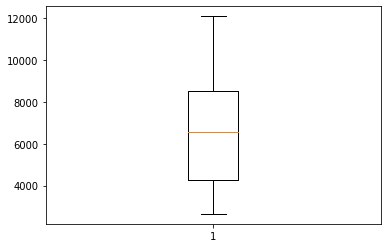

In [11]:
plt.boxplot(M)
q=np.percentile(M,99)
print(coup[M>q])

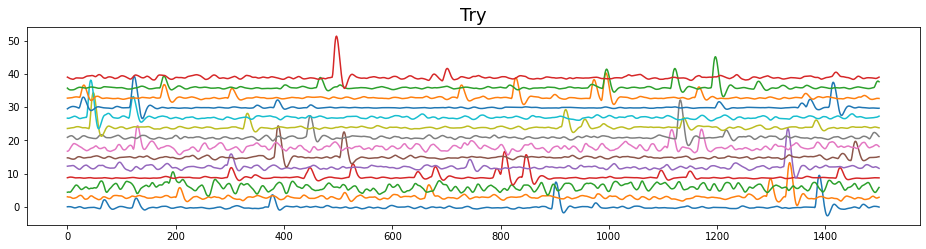

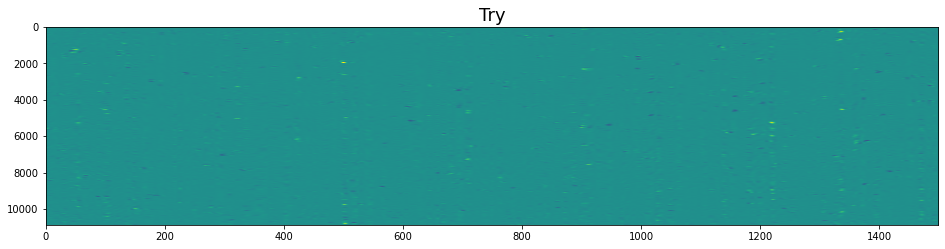

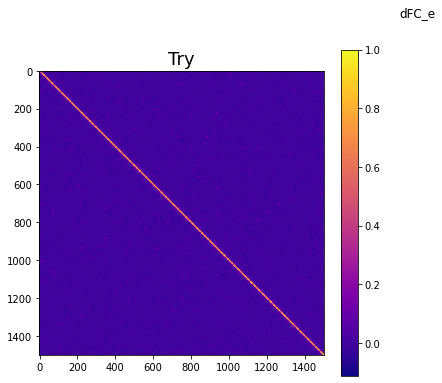

In [8]:
Btry=B[23,4,:,:]
plt.figure(figsize=(16,8))
plt.subplot(211)
plt.title('Try',fontsize=18)
for i in range(14):
    plt.plot(stats.zscore(Btry[:,i])+3*i)

plt.figure(figsize=(16,8))
plt.subplot(211)
plt.title('Try',fontsize=18)
plt.imshow(go_edge(Btry).T,vmin=-5.,vmax=5.,aspect='auto')

plt.figure(figsize=(14,6))
plt.suptitle('dFC_e')
plt.subplot(121)
plt.title('Try',fontsize=18)
plt.imshow(np.corrcoef(go_edge(Btry)),cmap='plasma')
plt.colorbar()

#The results of the simulations with highest measures are not showing that much co activations pattern, 
#it might be necessary to add other criterias (it combined well with Simpson)

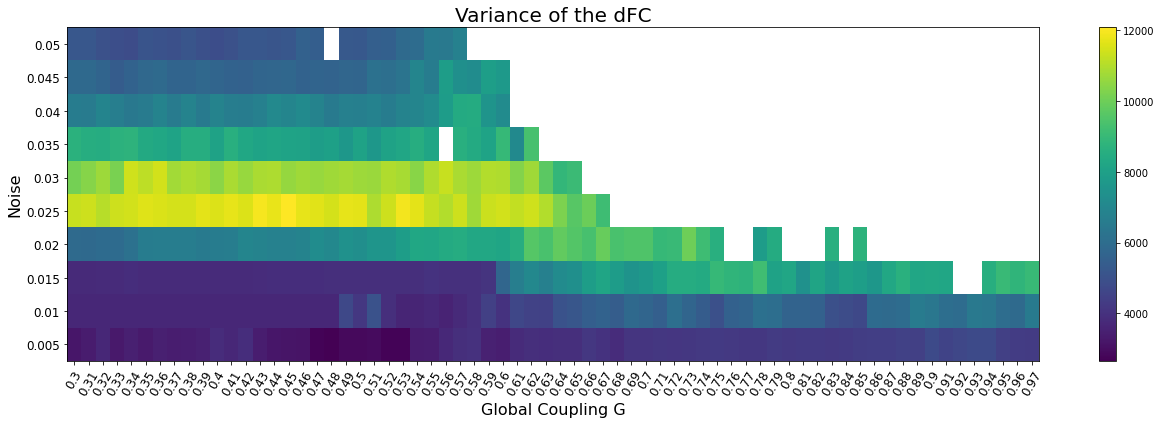

In [10]:
plt.figure(figsize=(18,6))
plt.imshow(MEASURE[:,::-1].T,aspect='auto',interpolation='nearest',cmap='viridis');
plt.xticks(np.arange(len(G)),np.around(G,3),rotation=60,fontsize=12);
plt.yticks(np.arange(len(N)),np.around(N,3)[::-1],fontsize=12);plt.title('Variance of the dFC', fontsize=20);
plt.colorbar();plt.xlabel('Global Coupling G',fontsize=16);plt.ylabel('Noise',fontsize=16);
plt.tight_layout()
plt.show()